- Clustering 알고리즘
    - K-means Clustering
    - Gaussian Mixxture : 각 클러스터가 정규분포를 따르도록 클러스터링한다!
    - Hierarchical Clustering, DBSCAN, HDBSCAN

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=1) 

In [3]:
####################################################
# Kmeans Clustering
####################################################

In [34]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(X)
print(f.labels_)
print(f.cluster_centers_)
print(f.inertia_)
pd.crosstab(f.labels_,Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

medv,5.0,5.6,6.3,7.0,7.2,7.4,7.5,8.1,8.3,8.4,...,43.8,44.0,44.8,45.4,46.0,46.7,48.3,48.5,48.8,50.0
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,11
1,2,1,1,1,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,1,1,0,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# determine the number of clusters
inertia_list = []
for k in range(2,30):
    f = KMeans(n_clusters=k)
    f.fit(X)
    inertia_list.append(f.inertia_)

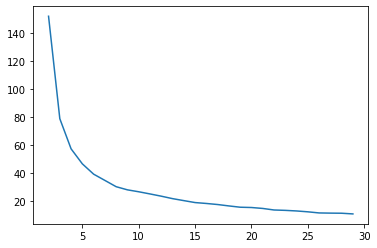

In [6]:
plt.plot(np.arange(2,30),inertia_list)

In [7]:
f = KMeans(n_clusters=5)
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,26,13
1,50,0,0
2,0,0,12
3,0,24,1
4,0,0,24


In [8]:
# after scaling & PCA
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [9]:
from sklearn.decomposition import PCA
f = PCA()
f.fit(X_s)
X_st = f.transform(X_s)


In [10]:
f = KMeans(n_clusters=3)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [11]:
# using the first component
# PCA - Dimension Reduction
from sklearn.decomposition import PCA
f = PCA(n_components=1)
f.fit(X_s)
X_st = f.transform(X_s)

In [12]:
f = KMeans(n_clusters=3)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,45,6
1,50,0,0
2,0,5,44


In [13]:
####################################################
# Kmeans Clustering with Train/Test
####################################################

In [14]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(xtrain)
f.labels_
pd.crosstab(f.labels_,ytrain)

col_0,0,1,2
row_0,,,
0,0,30,11
1,33,0,0
2,0,1,25


In [15]:
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)

col_0,0,1,2
row_0,,,
0,0,18,3
1,17,0,0
2,0,1,11


In [16]:
####################################################
# Gaussian Mixture
####################################################

- 각 cluster가 gaussian분포를 따르도록 클러스터링하는 기법

In [17]:
from sklearn.mixture import GaussianMixture
f = GaussianMixture(n_components=3)
f.fit(X)
f.means_
f.covariances_


array([[[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]],

       [[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]]])

In [18]:
yhat = f.predict(X)
pd.crosstab(yhat,Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,45,0
2,0,5,50


In [19]:
# after scaling
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [20]:
f = GaussianMixture(n_components=3)
f.fit(X_s)
pd.crosstab(f.predict(X_s),Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,5,50
2,0,45,0


In [21]:
# KMeans with scaling
f = KMeans(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)
f.fit(X_s)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [22]:
####################################################
# Hierachical Clustering
####################################################

In [23]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [24]:
# different options
f = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,50,24
2,0,0,26


In [25]:
####################################################
# DBSCAN
####################################################

In [26]:
from sklearn.cluster import DBSCAN
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X)
f.labels_
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,1,6,10
0,49,0,0
1,0,44,40


In [27]:
# using the first two components
from sklearn.decomposition import PCA
f = PCA(n_components=2)
f.fit(X_s)
X_st = f.transform(X_s)

In [28]:
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,2,3,7
0,48,0,0
1,0,47,43


In [29]:
col_list = ['k','b','r','g','y']
col = []
for i in range(len(f.labels_)):
    col.append(col_list[f.labels_[i]+1])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

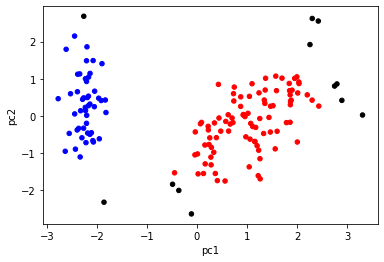

In [30]:
d = pd.DataFrame(X_st)
d.columns = ['pc1','pc2']
d.plot('pc1','pc2','scatter',c=col)

In [31]:
####################################################
# Clustering Practices
####################################################

In [32]:
# clustering boston data set only with X
# which method and how many cluster will you use?
# can you find the relation between the cluster and medv? 

In [33]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/flowertoman/data/main/data01_boston.csv')
X = df.iloc[:,:-1]
Y = df['medv']